In [46]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [47]:
# Import Dataset
book=pd.read_csv('book (1).csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# preprocessing

In [48]:
#shape
book.shape

(2000, 11)

In [49]:
#info
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [50]:
book.isna().sum() #check for NAN

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [61]:
#drop duplicates
book[book.duplicated()].shape #COUNT duplicate values

(1680, 11)

In [62]:
#gives duplocated row
book[book.duplicated()]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
10,0,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,1,0,0,0,0
12,1,0,0,0,0,1,0,0,0,0,1
15,1,1,1,0,0,0,1,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [63]:
#gives duplicated row
book[~book.duplicated()]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1956,1,0,1,0,1,0,0,0,1,0,0
1959,1,1,1,1,1,1,1,1,0,1,0
1960,1,0,1,1,1,0,0,1,1,0,1
1983,1,1,1,0,1,1,0,1,1,1,0


In [65]:
b=book.drop_duplicates() #drop duplicates


In [66]:
b.shape

(320, 11)

In [67]:
b.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.612500,0.450000,0.681250,0.490625,0.506250,0.556250,0.521875,0.334375,0.159375,0.190625,0.318750
std,0.487942,0.498273,0.466722,0.500695,0.500744,0.497604,0.500304,0.472510,0.366599,0.393409,0.466722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
b.shape

(320, 11)

In [69]:
b.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1956    False
1959    False
1960    False
1983    False
1995    False
Length: 320, dtype: bool

In [73]:
#visualisation

array([[<AxesSubplot:title={'center':'ChildBks'}>,
        <AxesSubplot:title={'center':'YouthBks'}>,
        <AxesSubplot:title={'center':'CookBks'}>],
       [<AxesSubplot:title={'center':'DoItYBks'}>,
        <AxesSubplot:title={'center':'RefBks'}>,
        <AxesSubplot:title={'center':'ArtBks'}>],
       [<AxesSubplot:title={'center':'GeogBks'}>,
        <AxesSubplot:title={'center':'ItalCook'}>,
        <AxesSubplot:title={'center':'ItalAtlas'}>],
       [<AxesSubplot:title={'center':'ItalArt'}>,
        <AxesSubplot:title={'center':'Florence'}>, <AxesSubplot:>]],
      dtype=object)

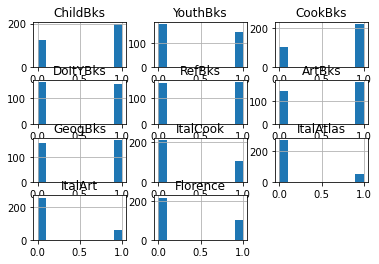

In [72]:
b.hist()

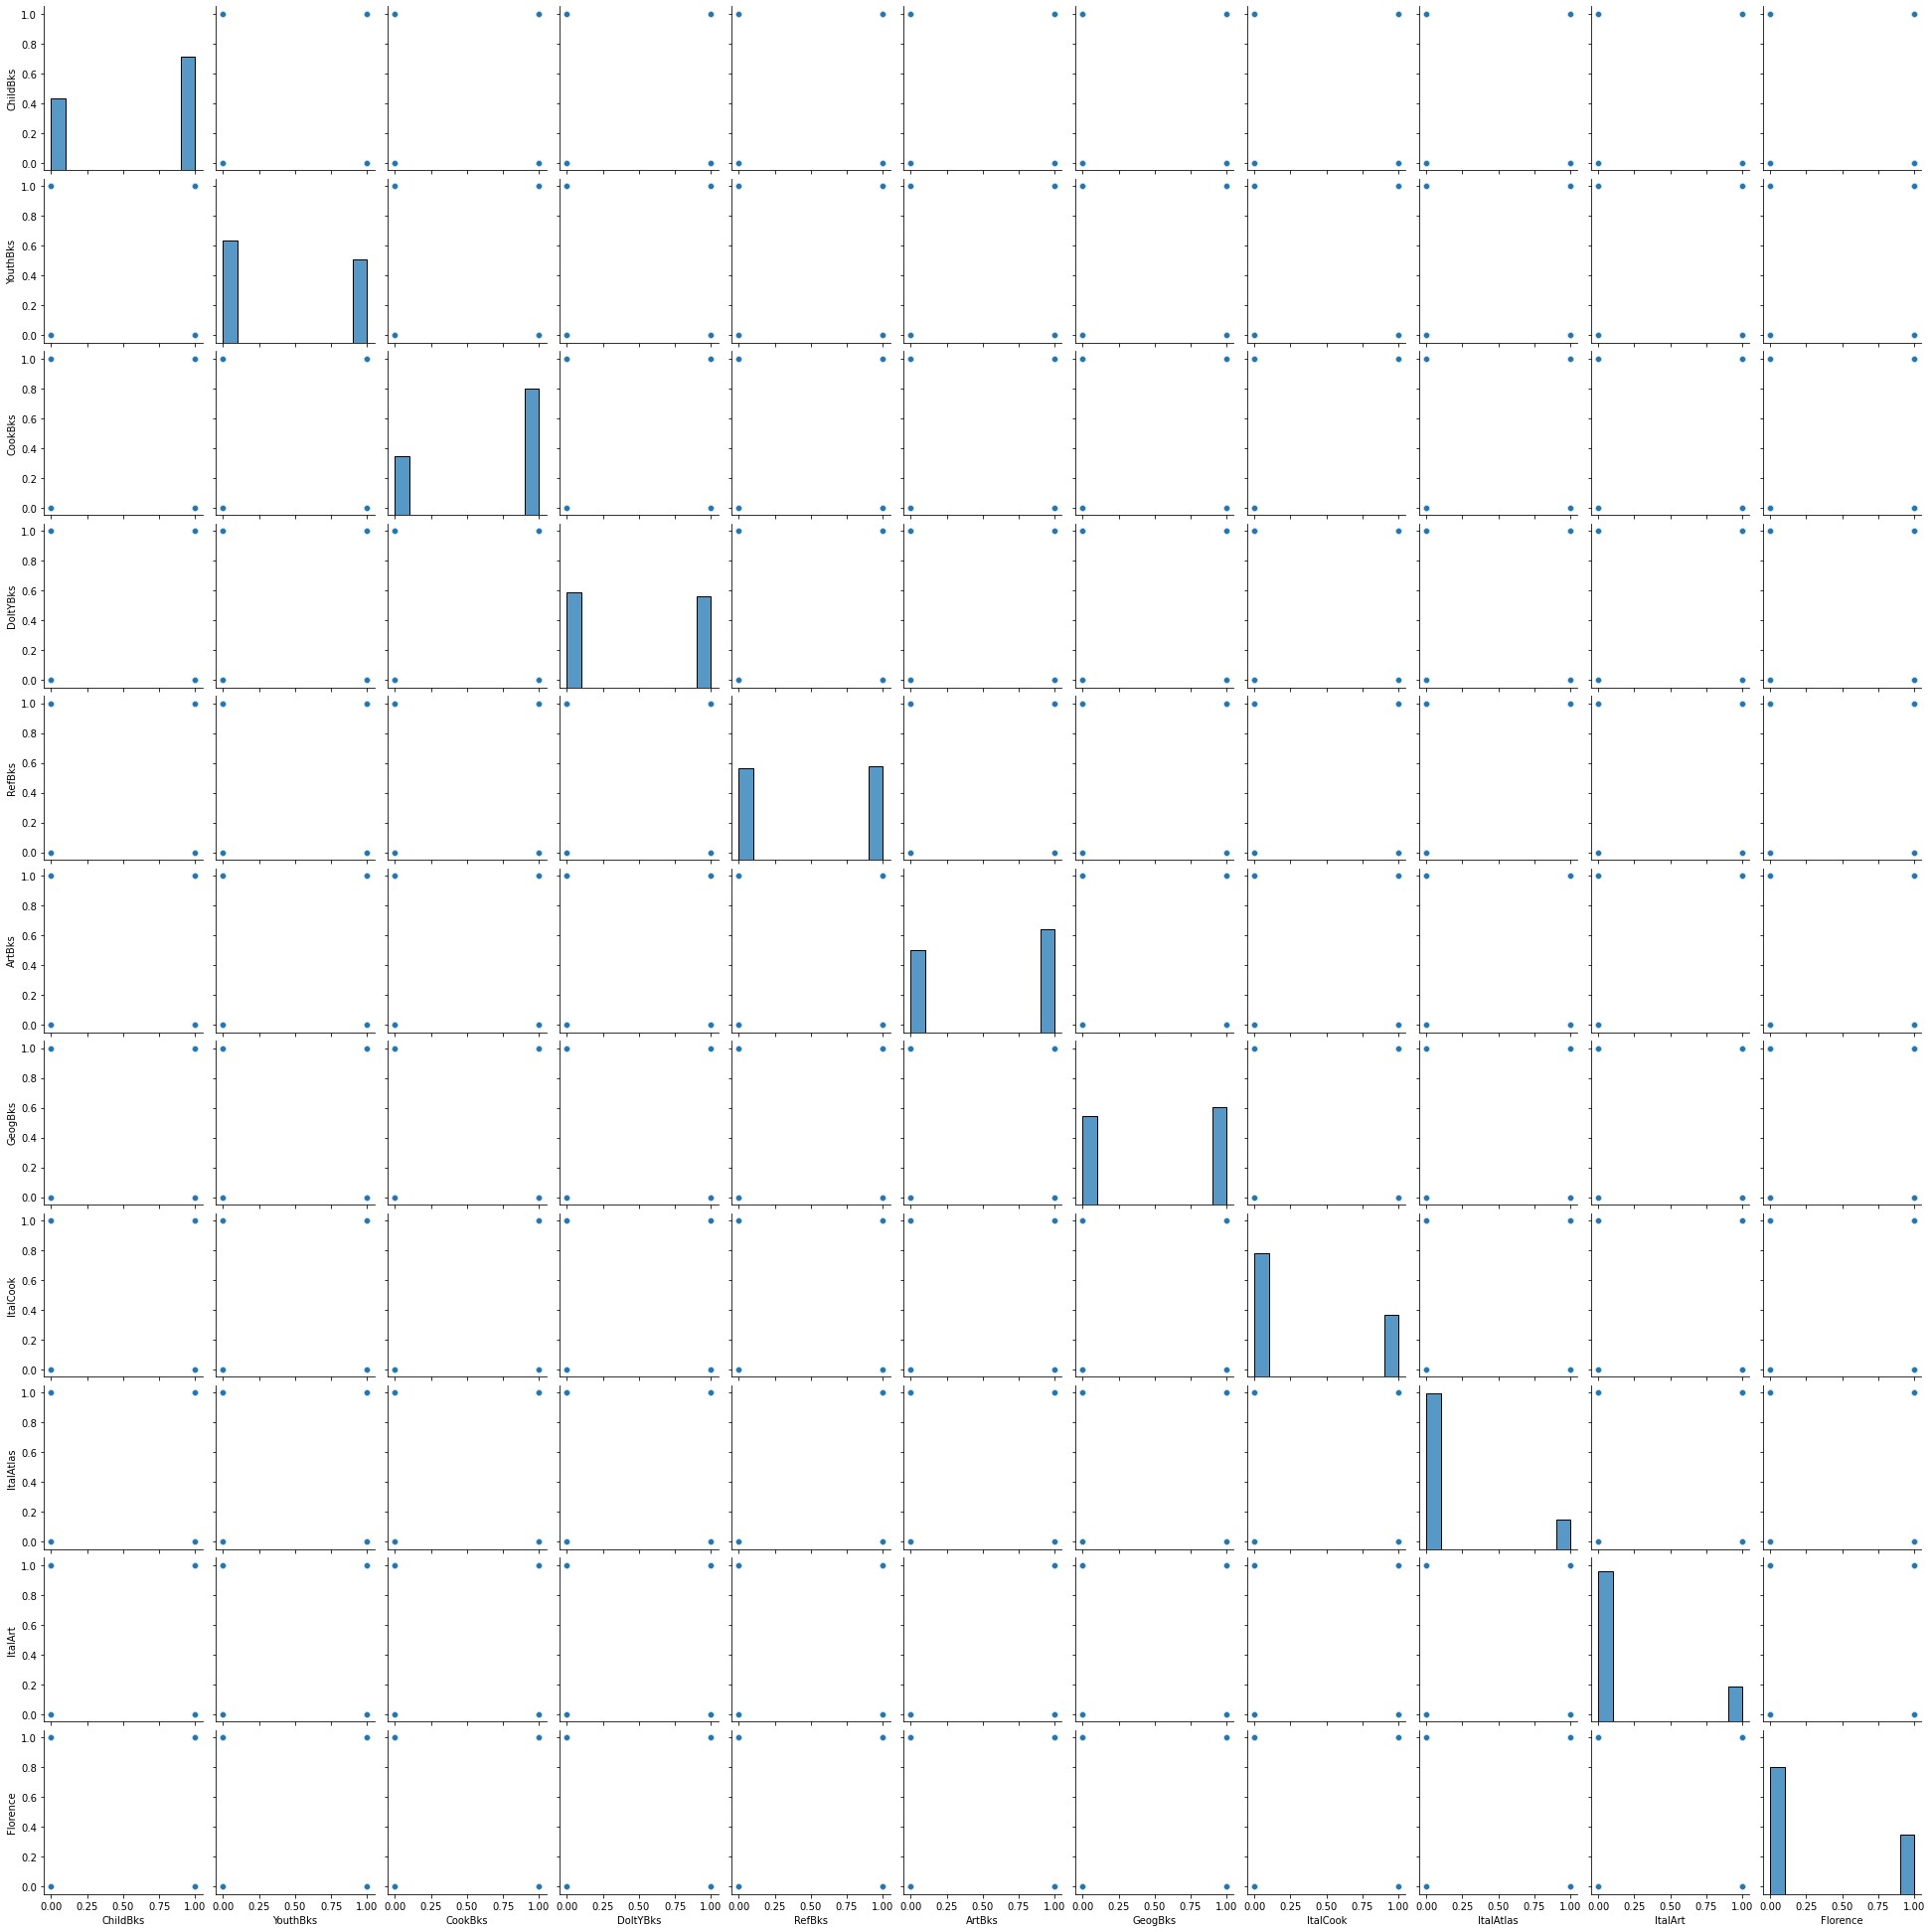

In [86]:
import seaborn as sns
# Create the default pairplot
sns.pairplot(b)

# apriori algorithm

In [74]:
#1. Association rules with 10% Support and 70% confidence
# With 10% Support
frequent_itemsets=apriori(b,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
...,...,...
152,0.106250,"(ArtBks, CookBks, DoItYBks, GeogBks)"
153,0.106250,"(ArtBks, CookBks, DoItYBks, ItalCook)"
154,0.103125,"(CookBks, RefBks, ArtBks, GeogBks)"
155,0.112500,"(ItalCook, CookBks, ArtBks, GeogBks)"


In [75]:

# with 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
1,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
2,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
3,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
4,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384
...,...,...,...,...,...,...,...,...,...
951,"(ItalCook, ArtBks)","(ItalArt, CookBks)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750
952,(ItalArt),"(ItalCook, CookBks, ArtBks)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062
953,(CookBks),"(ItalArt, ArtBks, ItalCook)",0.681250,0.128125,0.128125,0.188073,1.467890,0.040840,1.073835
954,(ArtBks),"(ItalArt, CookBks, ItalCook)",0.556250,0.128125,0.128125,0.230337,1.797753,0.056855,1.132801


In [76]:
## A leverage value of 0 indicates independence. Range will be [-1 1]
## A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
951,"(ItalCook, ArtBks)","(ItalArt, CookBks)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750
946,"(ItalArt, CookBks)","(ItalCook, ArtBks)",0.146875,0.193750,0.128125,0.872340,4.502402,0.099668,6.315625
504,"(ItalCook, ArtBks)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583
945,"(ItalCook, CookBks, ArtBks)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583
505,(ItalArt),"(ItalCook, ArtBks)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062
...,...,...,...,...,...,...,...,...,...
71,(RefBks),(Florence),0.506250,0.318750,0.150000,0.296296,0.929557,-0.011367,0.968092
391,(Florence),"(CookBks, RefBks)",0.318750,0.353125,0.103125,0.323529,0.916189,-0.009434,0.956250
390,"(CookBks, RefBks)",(Florence),0.353125,0.318750,0.103125,0.292035,0.916189,-0.009434,0.962266
32,(Florence),(YouthBks),0.318750,0.450000,0.121875,0.382353,0.849673,-0.021562,0.890476


In [77]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
1,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
2,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
3,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
4,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384
...,...,...,...,...,...,...,...,...,...
951,"(ItalCook, ArtBks)","(ItalArt, CookBks)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750
952,(ItalArt),"(ItalCook, CookBks, ArtBks)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062
953,(CookBks),"(ItalArt, ArtBks, ItalCook)",0.681250,0.128125,0.128125,0.188073,1.467890,0.040840,1.073835
954,(ArtBks),"(ItalArt, CookBks, ItalCook)",0.556250,0.128125,0.128125,0.230337,1.797753,0.056855,1.132801


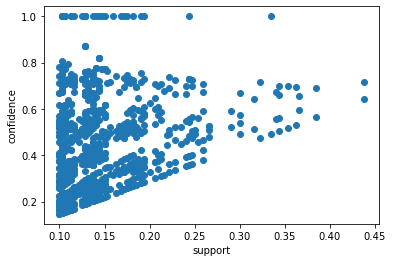

In [78]:

# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [79]:
#2. Association rules with 20% Support and 60% confidence
# With 20% Support
frequent_itemsets2=apriori(b,min_support=0.20,use_colnames=True)
frequent_itemsets2


,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.334375,(ItalCook)
8,0.318750,(Florence)
9,0.300000,"(YouthBks, ChildBks)"


In [14]:
# With 60% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
rules2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


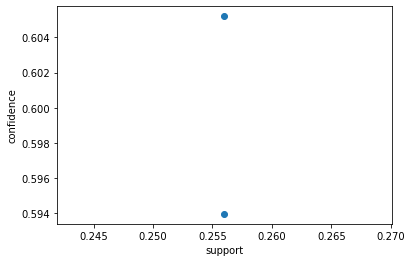

In [80]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [16]:
#3. Association rules with 5% Support and 80% confidence


In [81]:
# With 5% Support
frequent_itemsets3=apriori(b,min_support=0.05,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
...,...,...
419,0.053125,"(ItalCook, ItalArt, YouthBks, ArtBks, CookBks,..."
420,0.050000,"(DoItYBks, ItalCook, ItalArt, ArtBks, CookBks,..."
421,0.050000,"(ItalCook, GeogBks, RefBks, ArtBks, CookBks, C..."
422,0.056250,"(ItalCook, ItalArt, RefBks, ArtBks, CookBks, C..."


In [82]:
# With 80% confidence
rules3=association_rules(frequent_itemsets3,metric='lift',min_threshold=0.8)
rules3


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
1,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
2,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
3,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
4,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384
...,...,...,...,...,...,...,...,...,...
5569,(ItalArt),"(ItalCook, GeogBks, ArtBks, CookBks, ChildBks)",0.190625,0.090625,0.056250,0.295082,3.256077,0.038975,1.290044
5570,(GeogBks),"(ItalCook, ItalArt, ArtBks, CookBks, ChildBks)",0.521875,0.093750,0.056250,0.107784,1.149701,0.007324,1.015730
5571,(ArtBks),"(ItalCook, ItalArt, GeogBks, CookBks, ChildBks)",0.556250,0.056250,0.056250,0.101124,1.797753,0.024961,1.049922
5572,(CookBks),"(ItalCook, ItalArt, GeogBks, ArtBks, ChildBks)",0.681250,0.056250,0.056250,0.082569,1.467890,0.017930,1.028687


In [83]:
rules3[rules3.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
1,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
2,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
3,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
4,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384
...,...,...,...,...,...,...,...,...,...
5569,(ItalArt),"(ItalCook, GeogBks, ArtBks, CookBks, ChildBks)",0.190625,0.090625,0.056250,0.295082,3.256077,0.038975,1.290044
5570,(GeogBks),"(ItalCook, ItalArt, ArtBks, CookBks, ChildBks)",0.521875,0.093750,0.056250,0.107784,1.149701,0.007324,1.015730
5571,(ArtBks),"(ItalCook, ItalArt, GeogBks, CookBks, ChildBks)",0.556250,0.056250,0.056250,0.101124,1.797753,0.024961,1.049922
5572,(CookBks),"(ItalCook, ItalArt, GeogBks, ArtBks, ChildBks)",0.681250,0.056250,0.056250,0.082569,1.467890,0.017930,1.028687


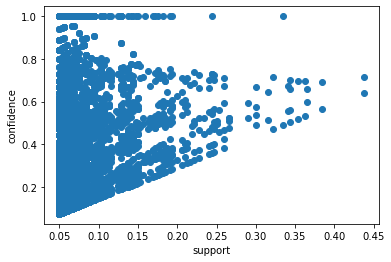

In [84]:
# visualization of obtained rule
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

